In [1]:
import sys
sys.path.append("..")
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"
TAR_PATH = "/home/yifan/experiments/backdoor/resnet18_CIFAR10/experiment10"
TAR_CONFIG_PATH = "/home/yifan/experiments/backdoor/resnet18_CIFAR10"
DEVICE ="cuda:0"
from AlignVis.DataInit import DataInit
import numpy as np
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH,DEVICE)
tar_datainit = DataInit(TAR_CONFIG_PATH,TAR_PATH,TAR_EPOCH,DEVICE)
####### get border points
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 451.14it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8504.75it/s]


In [2]:
from alignment.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,3,1,0.5)

100%|██████████| 250/250 [00:00<00:00, 7978.94it/s]


absolute alignment indicates number: 172 label diff indicates number: 518 confidence diff indicates number: 0 high distance number: 10385


In [4]:
from AlignVis.aproximate_ref_generator import ApproximateRefGenerator
aeg = ApproximateRefGenerator(ref_provider=ref_provider, tar_provider=tar_provider, REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH, tar_model=tar_model, ref_model=ref_model,DEVICE=DEVICE)

100%|██████████| 250/250 [00:00<00:00, 8750.82it/s]


In [ ]:
newRep = aeg.generate_representation_by_cka(predict_label_diff_indicates,epoch=1000, alpha_for_pred_ref=1,K_ALPHA=1,C_ALPHA=1)

In [6]:
print('reference predict res: ', ref_prediction_res[predict_label_diff_indicates[:10]])
print('adjusetd ref  predict res: ', ref_provider.get_pred(200, newRep).argmax(axis=1))
print('adjusetd ref 22 predict res: ', tar_provider.get_pred(200, newRep).argmax(axis=1))
print('target        predict res: ', tar_prediction_res[predict_label_diff_indicates[:10]])

reference predict res:  [4 4 4 4 4 4 4 4 4 4]


100%|██████████| 3/3 [00:00<00:00, 6345.39it/s]


adjusetd ref  predict res:  [3 7 4 9 3 4 4 4 4 9 4 2 4 4 7 2 4 6 4 3 3 6 3 7 4 4 9 3 4 1 4 5 4 8 0 4 3
 5 3 4 4 9 0 5 3 3 3 4 6 4 3 3 4 4 4 4 8 9 4 4 9 2 4 1 3 4 9 3 3 9 0 3 4 5
 4 4 4 4 4 4 4 7 1 4 3 3 3 4 1 4 4 4 0 4 4 7 4 3 0 3 3 3 0 0 3 3 0 3 7 7 4
 6 3 4 3 3 4 8 9 8 3 0 4 1 5 4 3 4 3 4 2 4 4 2 5 3 3 5 4 6 9 4 4 3 1 4 5 9
 4 3 4 4 4 3 7 4 2 4 1 7 4 8 7 3 4 1 3 0 4 4 4 3 2 6 2 9 1 5 7 3 3 3 3 4 0
 4 4 7 7 3 3 4 5 3 1 3 5 4 6 3 4 2 0 6 2 3 1 5 3 7 3 4 7 3 4 2 4 7 2 2 4 4
 2 2 3 4 7 3 0 4 3 4 4 4 3 5 5 8 0 7 3 5 3 3 4 4 5 4 6 2 4 4 3 0 4 4 5 5 5
 4 4 4 3 4 4 1 4 4 4 5 4 4 0 3 4 4 5 4 4 0 5 4 4 4 4 3 4 4 4 9 3 2 3 2 4 4
 3 6 5 2 4 0 5 4 4 4 3 3 0 0 4 3 0 4 4 4 4 3 3 9 4 0 7 3 4 4 3 0 7 1 2 2 4
 4 8 3 4 5 4 4 4 4 2 4 3 4 9 3 5 4 4 8 4 5 3 3 4 6 8 0 2 6 4 1 3 2 3 1 5 3
 4 9 7 4 4 4 9 9 4 4 3 4 6 4 4 8 4 3 7 7 1 3 9 3 1 1 4 4 8 0 3 3 6 0 0 0 7
 3 6 3 4 0 3 4 4 4 5 2 3 4 3 7 4 6 7 4 4 4 3 4 3 6 5 4 3 4 7 4 4 6 0 4 6 4
 4 4 5 4 4 4 4 4 4 3 4 5 1 8 4 4 4 3 3 8 5 3 3 3 4 4 2 5 4 4 4 3 4 6 4 7

100%|██████████| 3/3 [00:00<00:00, 6026.30it/s]

adjusetd ref 22 predict res:  [1 1 1 5 5 1 0 1 0 1 0 1 0 1 5 1 0 8 0 3 3 3 3 1 1 0 5 5 0 8 1 8 0 1 0 1 5
 5 1 0 0 1 2 5 1 2 3 0 1 2 2 1 1 1 1 0 1 5 8 8 1 8 1 5 3 8 1 1 1 1 1 3 8 6
 1 8 1 0 0 1 1 0 8 1 3 3 3 0 0 1 0 1 1 1 1 0 0 5 1 1 1 5 2 2 1 1 0 1 1 1 8
 5 1 0 1 3 1 1 1 1 3 0 1 5 9 1 1 1 1 1 1 1 1 1 8 1 1 1 0 1 1 1 1 1 1 0 1 1
 8 5 1 1 0 3 2 8 9 1 3 2 0 1 1 6 0 5 5 5 0 0 0 3 2 3 1 1 0 5 3 1 3 1 5 1 7
 0 1 1 1 1 3 0 1 1 3 1 9 1 1 5 0 1 9 1 2 1 8 8 3 0 2 1 8 1 8 1 1 1 9 1 0 1
 1 1 1 1 2 5 0 1 5 1 0 1 1 8 1 1 1 8 1 5 1 1 8 0 8 1 8 1 1 1 3 0 0 8 1 1 3
 1 1 0 1 0 0 8 1 1 1 9 0 1 4 1 1 0 0 8 1 9 1 1 8 0 8 3 9 0 0 5 5 1 1 1 0 1
 3 5 1 1 0 8 8 1 0 8 1 1 3 7 1 3 1 1 1 0 1 1 1 1 0 3 1 0 0 1 1 1 1 5 1 1 1
 1 1 5 0 9 1 1 1 1 2 0 1 8 1 1 5 1 1 1 1 1 3 1 1 2 8 1 1 8 1 8 5 7 1 5 8 1
 1 1 1 1 0 0 5 1 0 0 1 0 1 1 0 1 0 3 2 1 5 3 1 1 5 1 0 8 8 2 3 1 8 0 1 1 1
 3 1 1 1 3 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 8 5 0 0 1 0 9 1 1 1 1
 0 1 1 0 0 1 1 0 1 1 0 0 8 1 1 0 0 1 1 1 1 5 3 8 0 1 2 9 1 1 0 1 0 1 1

In [23]:
print('reference predict res: ', ref_prediction_res[predict_label_diff_indicates])
print('adjusetd ref  predict res: ', ref_provider.get_pred(200, newRep).argmax(axis=1))
print('adjusetd ref 22 predict res: ', tar_provider.get_pred(200, newRep).argmax(axis=1))
print('target        predict res: ', tar_prediction_res[predict_label_diff_indicates])

reference predict res:  [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 3 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 6 4 4 4 1 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 7
 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 

100%|██████████| 1/1 [00:00<00:00, 3466.37it/s]


adjusetd ref  predict res:  [4 4 4 4 4 4 4 4 4 4]


100%|██████████| 1/1 [00:00<00:00, 2507.06it/s]

adjusetd ref 22 predict res:  [1 1 1 1 1 1 1 1 1 1]
target        predict res:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 5 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 9 1 1 1 0 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 9
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 2 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1

In [3]:

ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 9058.19it/s]
../representationTrans/trans_visualizer_border.py:186: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data = self.data_provider.train_representation(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels = self.data_provider.train_labels(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

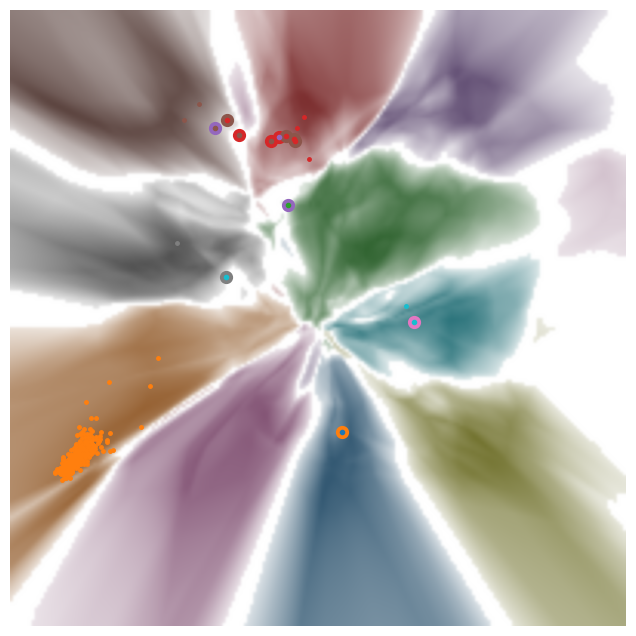

In [4]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=TAR_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, I,I, np.dot(tar_train_data, I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

In [7]:
new_ref_representations = ref_provider.train_representation(200)
for i in range(len(predict_label_diff_indicates)):
    index = predict_label_diff_indicates[i]
    new_ref_representations[index] = newRep[i]

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 9841.74it/s]
../representationTrans/trans_visualizer_border.py:186: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data = self.data_provider.train_representation(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels = self.data_provider.train_labels(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

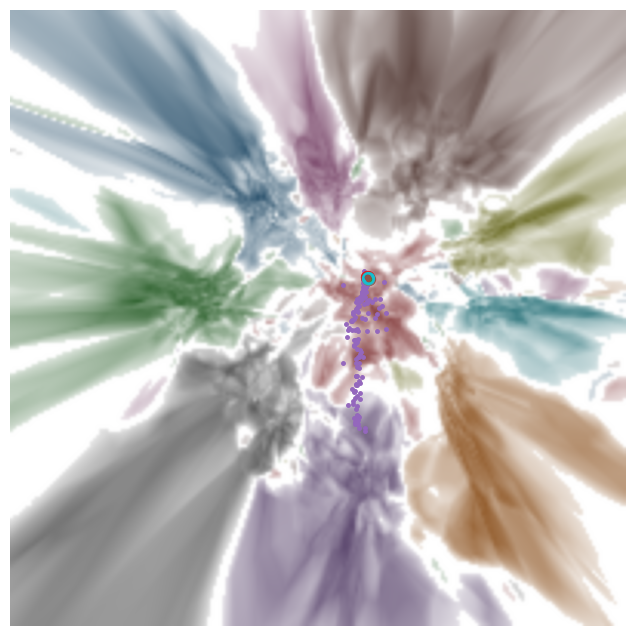

In [10]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
# from AlignVis.visualizerwr import visualizer
from representationTrans.trans_visualizer_border import visualizer
vis = visualizer(ref_provider,I,I, np.dot(new_ref_representations,I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 9845.09it/s]
../representationTrans/trans_visualizer_border.py:186: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data = self.data_provider.train_representation(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels = self.data_provider.train_labels(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

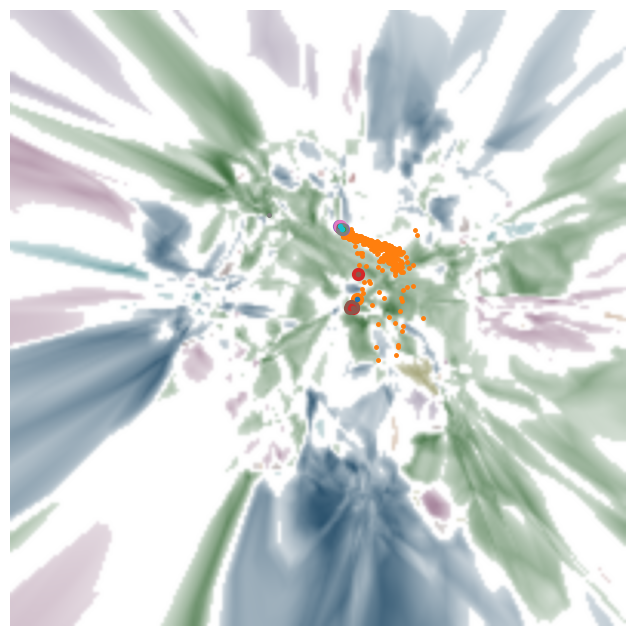

In [12]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
# from AlignVis.visualizerwr import visualizer
from representationTrans.trans_visualizer_border import visualizer
vis = visualizer(tar_provider,I,I, np.dot(new_ref_representations,I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

In [24]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()

print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(ref_train_data[indicates_],tar_train_data[indicates_]))

NameError: name 'indicates_' is not defined

In [12]:

import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
from representationTrans.trans_visualizer_border import visualizer
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')

from AlignVis.AlignMetrixGenerator import TrainingSnapshotAlignment

alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
# R_n = alignment_n.align_embeddings_batch(X,Y,train_steps=1000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-18,N_LAMBDA=100)

In [17]:
X = new_ref_representations
Y = tar_train_data
R_n_2 = alignment_n.align_embeddings_batch(X,Y,train_steps=2000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-18,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 91513592.0 loss2 {tensor(0.8521, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8700, requires_grad=True)}
batch_idx 199,iteration 199, loss1 172.14654541015625 loss2 {tensor(0.7659, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6920, requires_grad=True)}
batch_idx 398,iteration 398, loss1 108.8935546875 loss2 {tensor(0.7201, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6470, requires_grad=True)}
batch_idx 97,iteration 597, loss1 111.31665802001953 loss2 {tensor(0.7236, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6070, requires_grad=True)}
batch_idx 296,iteration 796, loss1 97.19482421875 loss2 {tensor(0.6830, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6290, requires_grad=True)}
batch_idx 495,iteration 995, loss1 81.23748016357422 loss2 {tensor(0.6017, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5560, requires_grad=True)}
batch_idx 194,iteration 1194, loss1 63.136512756347656 loss2 {tensor(0.5367, grad_fn=<AddBackward0>)} neibour_loss {

In [19]:
X = new_ref_representations
Y = tar_train_data
R_n = alignment_n.align_embeddings_batch(Y,X,train_steps=5000,CKA_LAMBDA=1,CKA_LAMBAD_FOR_INIT=1e-3,N_LAMBDA=1)

batch_idx 0,iteration 0, loss1 4182969.5 loss2 {tensor(0.7312, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8320, requires_grad=True)}
batch_idx 199,iteration 199, loss1 38314.4375 loss2 {tensor(0.6163, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6670, requires_grad=True)}
batch_idx 398,iteration 398, loss1 1756.8629150390625 loss2 {tensor(0.7404, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6870, requires_grad=True)}
batch_idx 97,iteration 597, loss1 1161.16943359375 loss2 {tensor(0.6609, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6500, requires_grad=True)}
batch_idx 296,iteration 796, loss1 593.3255615234375 loss2 {tensor(0.6856, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6000, requires_grad=True)}
batch_idx 495,iteration 995, loss1 497.8504638671875 loss2 {tensor(0.6329, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5420, requires_grad=True)}
batch_idx 194,iteration 1194, loss1 587.959716796875 loss2 {tensor(0.7156, grad_fn=<AddBackward0>)} neibour_loss {tensor

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 9687.40it/s]
../representationTrans/trans_visualizer_border.py:186: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data = self.data_provider.train_representation(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels = self.data_provider.train_labels(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

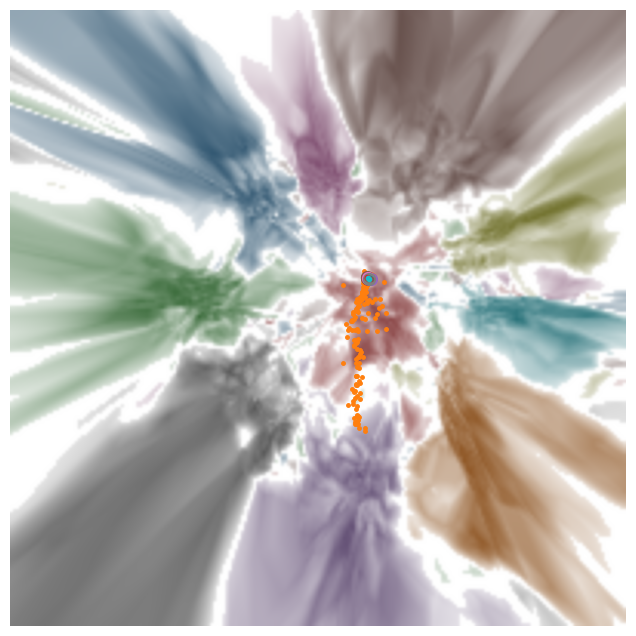

In [20]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, R_n_2.detach().numpy(),I, np.dot(new_ref_representations,I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 3/3 [00:00<00:00, 8836.31it/s]


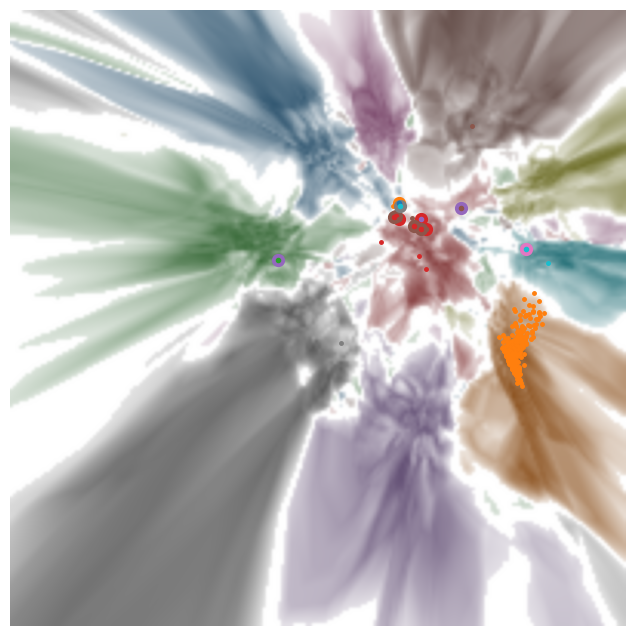

In [25]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, R_n_2.detach().numpy(),I, np.dot(tar_train_data, R_n.detach().numpy()), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 1/1 [00:00<00:00, 3744.91it/s]


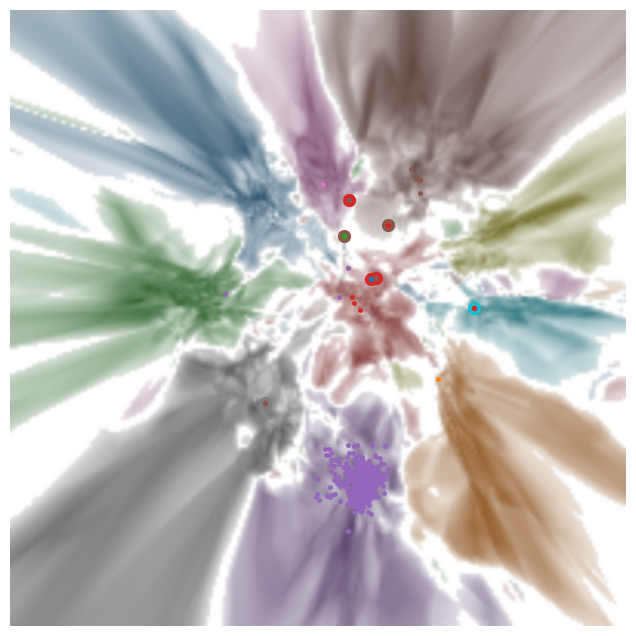

In [24]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
# from AlignVis.visualizerwr import visualizer
from representationTrans.trans_visualizer_border import visualizer
vis = visualizer(ref_provider,I,I, ref_provider.train_representation(200), projector, 200,[[predict_label_diff_indicates]],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 9612.36it/s]
../representationTrans/trans_visualizer_border.py:186: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data = self.data_provider.train_representation(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels = self.data_provider.train_labels(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

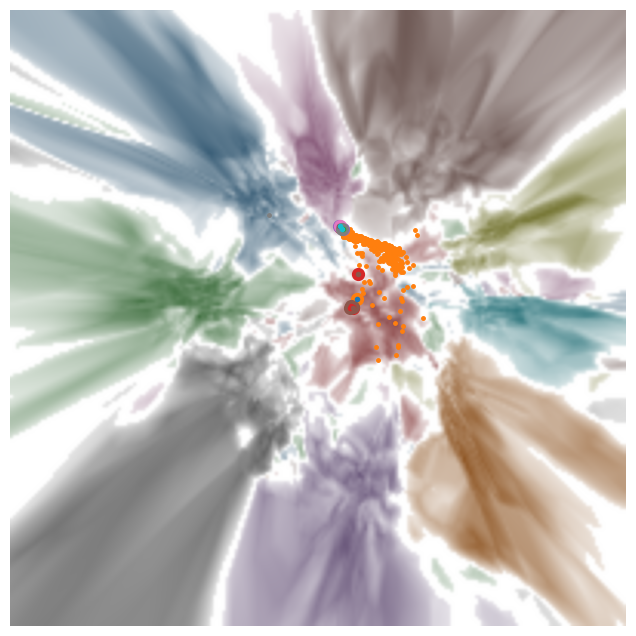

In [39]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
# from AlignVis.visualizerwr import visualizer
from representationTrans.trans_visualizer_border import visualizer
vis = visualizer(tar_provider,R_n_2.detach().numpy(),I, ref_train_data, projector, 200,[[predict_label_diff_indicates]],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 9666.97it/s]
../representationTrans/trans_visualizer_border.py:186: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data = self.data_provider.train_representation(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels = self.data_provider.train_labels(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

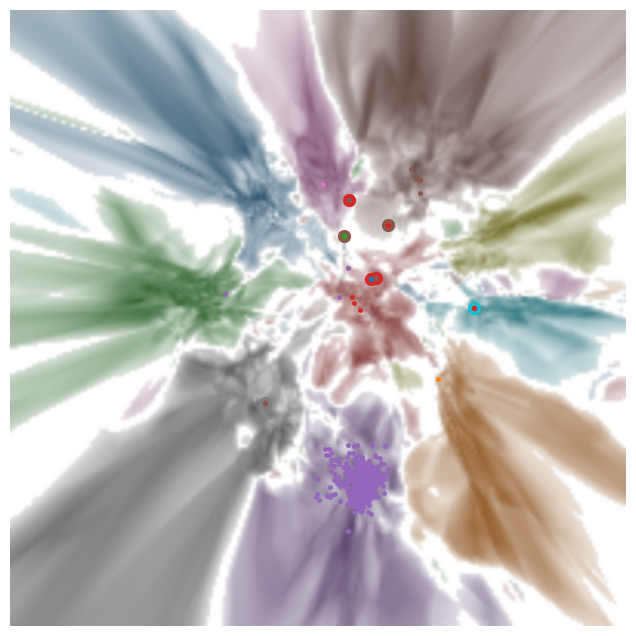

In [36]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
# from AlignVis.visualizerwr import visualizer
from representationTrans.trans_visualizer_border import visualizer
vis = visualizer(ref_provider,I,I, ref_provider.train_representation(200), projector, 200,[[predict_label_diff_indicates]],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))